[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hemanth1403/IIITH-Student-training-program-AIML/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb)

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

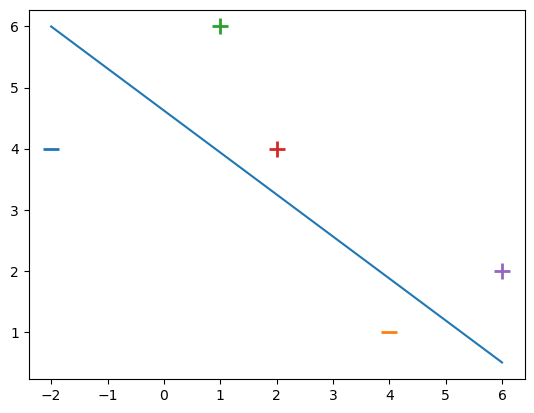

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

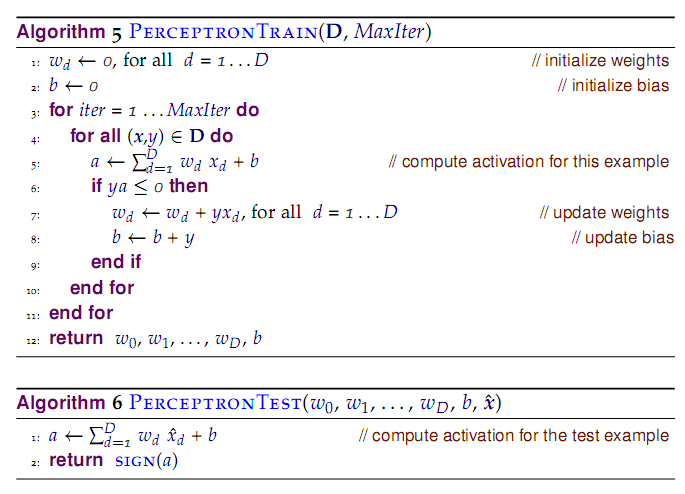

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [6]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

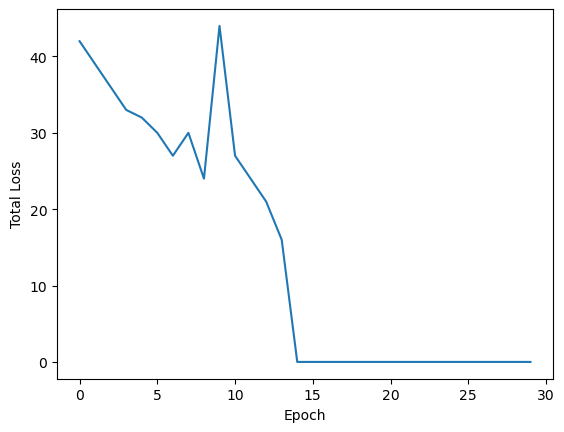

In [7]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

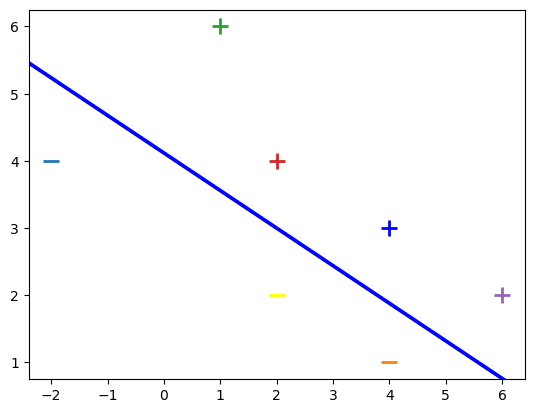

In [8]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



1. A. (i.) Sonar Dataset 

In [158]:
from sklearn.decomposition import PCA  
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

data = pd.read_csv("./Sonar.csv")
print(data.head())

       V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

      V10  ...     V52     V53     V54     V55     V56     V57     V58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V59     V60  Class  
0  0.0090  0.0032      1  
1  0.0052  0.0044      1  
2  0.0095  

In [159]:
X = data.iloc[:,:60].values
y_sonar = data.iloc[:,-1].values
print(np.shape(X), np.shape(y_sonar))

(208, 60) (208,)


In [160]:
X_std = StandardScaler().fit_transform(X)
print(np.std(X_std))

0.9999999999999999


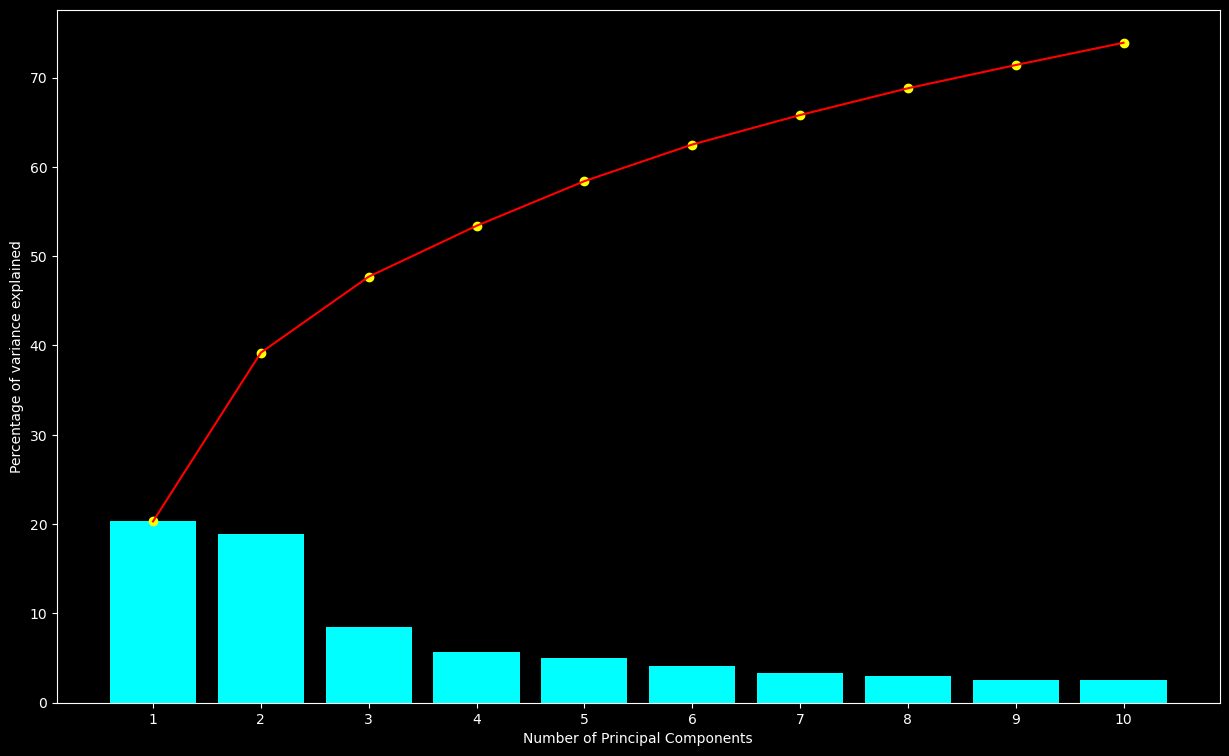

In [161]:
pca = PCA() 
pca.fit(X_std) 
pca_data = pca.transform(X_std) 


per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [162]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
print(X_pca)

[[ 1.92116817 -1.37089312]
 [-0.48012458  7.58638801]
 [ 3.8592282   6.43986016]
 [ 4.59741943 -3.10408888]
 [-0.53386761  1.84984701]
 [-1.24701593  3.78548414]
 [ 1.87007312  2.49551038]
 [-2.05769816  2.3147504 ]
 [-1.64556277  0.25372155]
 [-4.28065736 -2.42781795]
 [-1.46164351 -6.32305562]
 [-2.46394888 -1.2537634 ]
 [-3.99546982  1.64506244]
 [ 0.6370814  -0.63741683]
 [-0.10539302 -0.25210417]
 [ 2.11242307  0.59393523]
 [ 4.39574903 -2.25749069]
 [ 1.43859617  1.90219042]
 [-1.03943408 -3.29436397]
 [-1.16485881  8.59655069]
 [ 2.64812566  1.66803742]
 [ 6.23535677 -1.47389049]
 [11.23389579 -2.75609298]
 [-0.24732176 -4.86351661]
 [ 2.65154822 -4.39934635]
 [-0.42203896 -7.16826626]
 [-3.69919995  2.49392786]
 [-2.90589296  0.16356259]
 [-1.8957691   1.49786172]
 [-2.38880313  1.37815246]
 [-2.32050849 -1.198227  ]
 [-3.50572573 -0.58086138]
 [ 0.04322219  0.36634604]
 [ 1.0292047   0.06587682]
 [-0.68903218  1.11801579]
 [-1.9337308   0.63038558]
 [ 0.26804541 -3.41912075]
 

In [163]:
X_sonar = np.append(X_pca,[[-1] for i in range(208)],axis = 1)
print(X_sonar)


[[ 1.92116817 -1.37089312 -1.        ]
 [-0.48012458  7.58638801 -1.        ]
 [ 3.8592282   6.43986016 -1.        ]
 [ 4.59741943 -3.10408888 -1.        ]
 [-0.53386761  1.84984701 -1.        ]
 [-1.24701593  3.78548414 -1.        ]
 [ 1.87007312  2.49551038 -1.        ]
 [-2.05769816  2.3147504  -1.        ]
 [-1.64556277  0.25372155 -1.        ]
 [-4.28065736 -2.42781795 -1.        ]
 [-1.46164351 -6.32305562 -1.        ]
 [-2.46394888 -1.2537634  -1.        ]
 [-3.99546982  1.64506244 -1.        ]
 [ 0.6370814  -0.63741683 -1.        ]
 [-0.10539302 -0.25210417 -1.        ]
 [ 2.11242307  0.59393523 -1.        ]
 [ 4.39574903 -2.25749069 -1.        ]
 [ 1.43859617  1.90219042 -1.        ]
 [-1.03943408 -3.29436397 -1.        ]
 [-1.16485881  8.59655069 -1.        ]
 [ 2.64812566  1.66803742 -1.        ]
 [ 6.23535677 -1.47389049 -1.        ]
 [11.23389579 -2.75609298 -1.        ]
 [-0.24732176 -4.86351661 -1.        ]
 [ 2.65154822 -4.39934635 -1.        ]
 [-0.42203896 -7.16826626

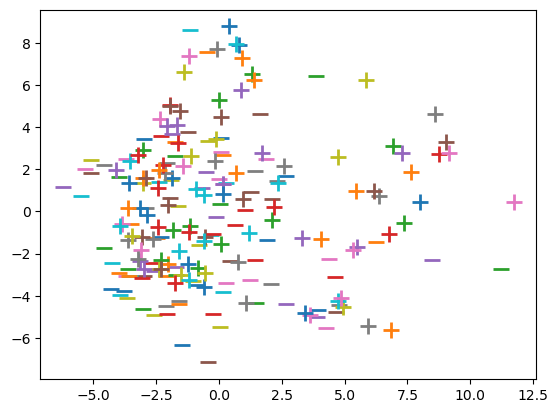

In [164]:
for d, sample in enumerate(X_sonar):
    if d < 97:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

In [165]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 5
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

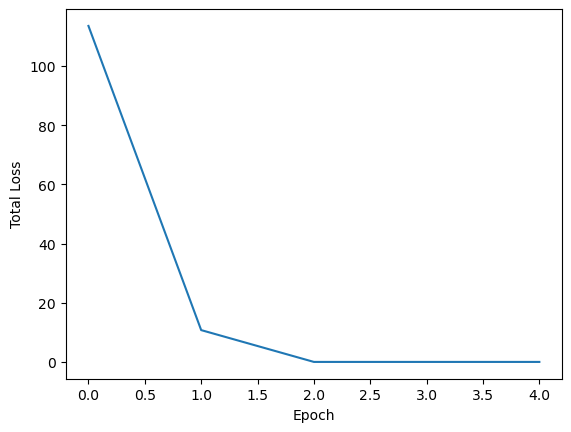

In [166]:
w = perceptron_algo_plot(X_sonar, y_sonar)

In [167]:
w

array([  1.47899211,   0.17334354, -17.        ])

(ii.) Banknote Dataset

In [168]:
from sklearn.decomposition import PCA  
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

data = pd.read_csv("./banknote-authentication.csv")
print(data.head())

   variance    skew  curtosis  entropy  class
0   3.62160  8.6661   -2.8073 -0.44699      0
1   4.54590  8.1674   -2.4586 -1.46210      0
2   3.86600 -2.6383    1.9242  0.10645      0
3   3.45660  9.5228   -4.0112 -3.59440      0
4   0.32924 -4.4552    4.5718 -0.98880      0


In [169]:
X = data.iloc[:,:4].values
y_banknote = data.iloc[:,-1].values
print(np.shape(X), np.shape(y))

(1372, 4) (1372,)


In [170]:
X_std = StandardScaler().fit_transform(X)
print(np.std(X_std))

1.0


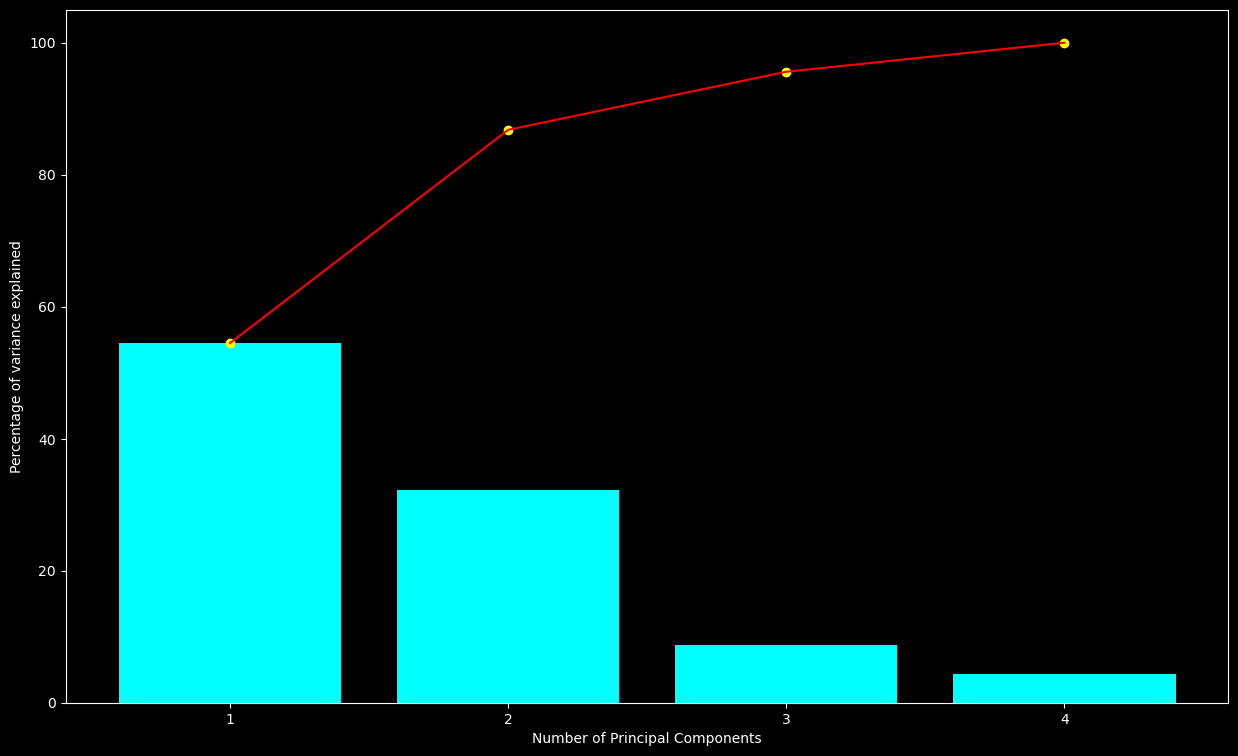

In [171]:
pca = PCA() 
pca.fit(X_std) 
pca_data = pca.transform(X_std) 


per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels_all = ['PC'+str(x) for x in range(1, len(per_var)+1)]
per_var=per_var[:10]
labels = [str(x) for x in range(1, len(per_var)+1)]

with plt.style.context('dark_background'):
    plt.figure(figsize = (15, 9))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage of variance explained")
    plt.bar(range(1,len(per_var)+1), per_var, tick_label=labels, color = "aqua")
    plt.plot(range(1,len(per_var)+1), np.cumsum(per_var), color = "red")
    plt.scatter(range(1,len(per_var)+1), np.cumsum(per_var), color = "yellow")

In [172]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
print(X_pca)

[[-1.47280494 -1.16391668]
 [-1.63944068 -1.09381204]
 [ 0.51391884 -1.32487953]
 ...
 [ 4.04932734  2.03602288]
 [ 3.01961738  1.39214023]
 [ 1.17058249  0.09103094]]


In [173]:
X_banknote = np.append(X_pca,[[-1.0] for i in range(1372)],axis = 1)
print(X_banknote)

[[-1.47280494 -1.16391668 -1.        ]
 [-1.63944068 -1.09381204 -1.        ]
 [ 0.51391884 -1.32487953 -1.        ]
 ...
 [ 4.04932734  2.03602288 -1.        ]
 [ 3.01961738  1.39214023 -1.        ]
 [ 1.17058249  0.09103094 -1.        ]]


In [174]:
unique, counts = np.unique(y, return_counts=True)

temp = dict(zip(unique, counts))
print(temp)

{0: 762, 1: 610}


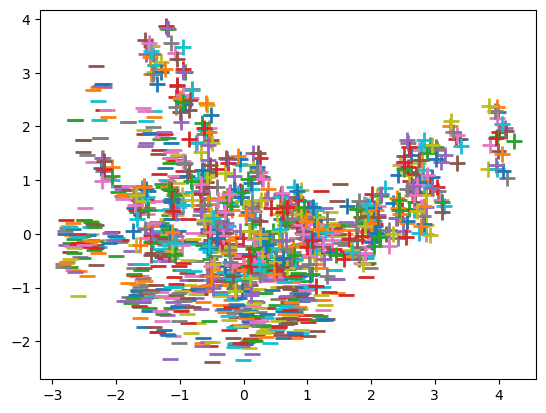

In [175]:
for d, sample in enumerate(X_banknote):
    if d < 762:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

In [176]:
def perceptron_algo_plot(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    n = 5
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

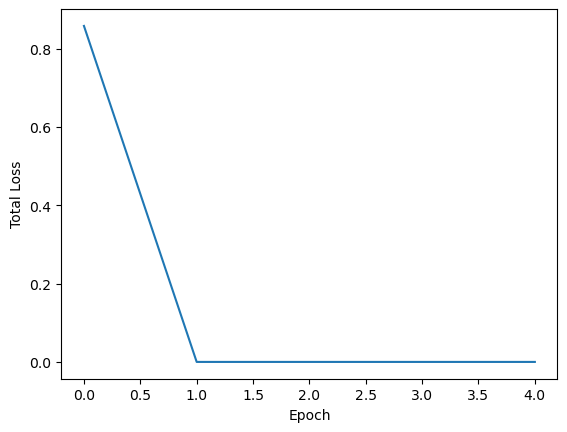

In [177]:
w = perceptron_algo_plot(X_banknote, y_banknote)

In [178]:
print(w)

[ 0.42873418  1.35449963 -3.        ]


2. A. Increased learning rate

array([  14.7899211,    1.7334354, -170.       ])

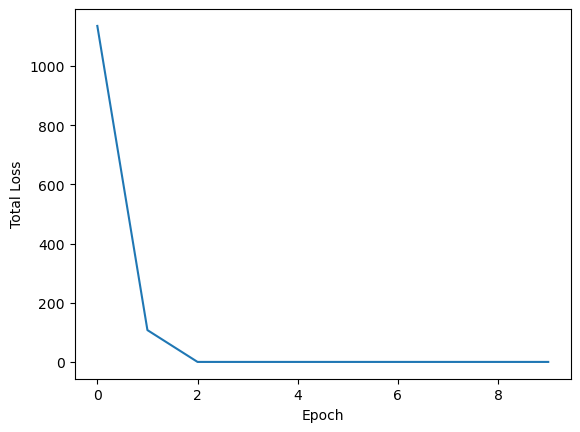

In [187]:
def perceptron_algo_plot1(X, Y):
    w = np.zeros(len(X[0]))
    eta = 10
    n = 10
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w
perceptron_algo_plot1(X_sonar, y_sonar)


array([  4.28734183,  13.54499635, -30.        ])

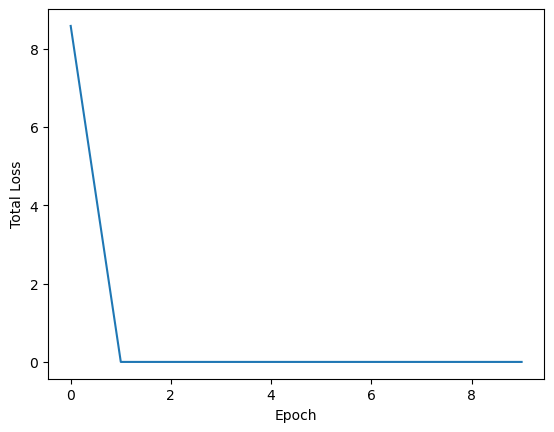

In [188]:
perceptron_algo_plot1(X_banknote, y_banknote)

High Learning Rate: <br>If the learning rate is too high, the network’s weights may change too quickly, which might cause the model to overshoot the ideal outcome. This can result in unstable training and poor performance. In other words, a high learning rate helps the network to take long strides toward minimum error. But as the network approaches the bottom of the error curve, these long strides can impede convergence.

Decreased learning rate

array([ 0.00147899,  0.00017334, -0.017     ])

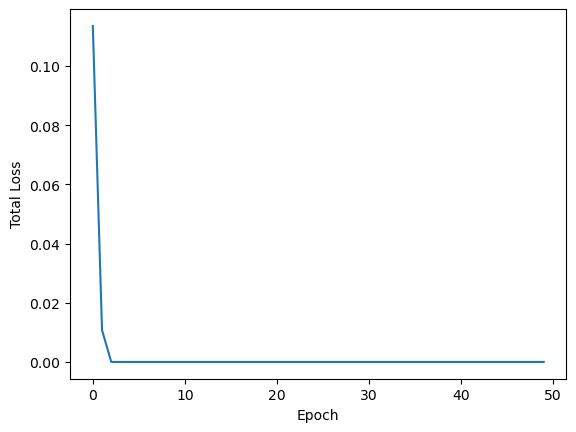

In [190]:
def perceptron_algo_plot2(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.001
    n = 50
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w
perceptron_algo_plot2(X_sonar, y_sonar)


array([ 0.00042873,  0.0013545 , -0.003     ])

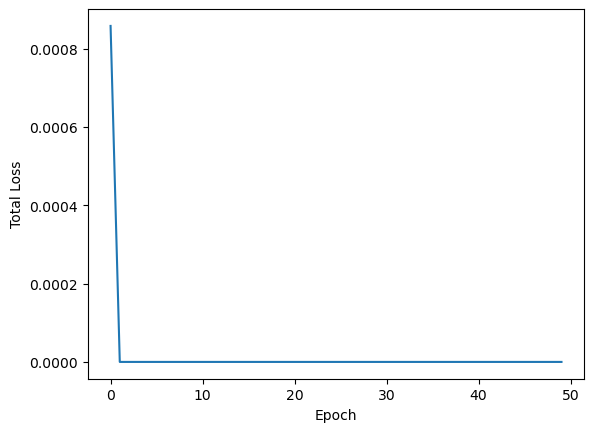

In [191]:
perceptron_algo_plot2(X_banknote, y_banknote)


Low Learning Rate: <br>On the other hand, if the learning rate is too low, the model may either take too long to converge or get stuck in an undesirable local minimum. A value too small may result in a long training process that could get stuck.

3. A.

In [192]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [193]:
y = np.array([-1, -1, 1, -1, -1])

[-0.002  0.003  0.025]


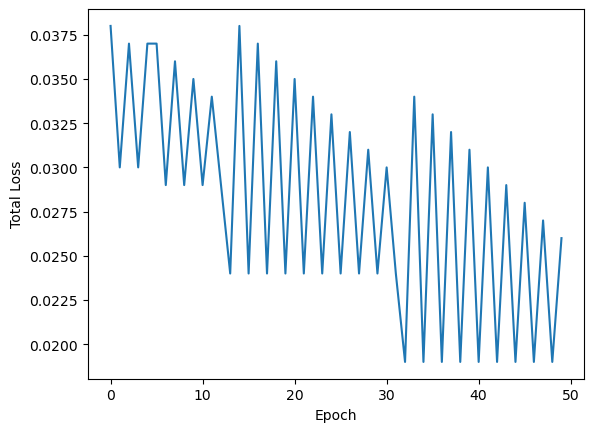

In [194]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.